In [ ]:
import nltk


In [ ]:
import numpy as np
import pandas as pd
import string
import re
import matplotlib.pyplot as plt

In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 


In [ ]:
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.utils import resample

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Data Preprocessing

In [ ]:
df = pd.read_csv("Data1.csv")

In [ ]:
df.head()

,Unnamed: 0,review
0,0,excellent look
1,1,good product
2,2,nice dress
3,3,loved clothes
4,4,really product photo satisfied trust maintained


In [ ]:
df['review'] = df['review'].astype('str')

In [ ]:
import re
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [ ]:
df['review'] = df['review'].apply(deEmojify)

In [ ]:
def remove_punctuation(text): 
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
    return text.translate(translator)

In [ ]:
df['review'] = df['review'].apply(remove_punctuation)

In [ ]:
def remove_numbers(text): 
    result = re.sub(r'\d+', '', text) 
    return result 

In [ ]:
df['review'] = df['review'].apply(remove_numbers)

In [ ]:
def text_lowercase(text): 
    return text.lower() 

In [ ]:
df['review'] = df['review'].apply(text_lowercase)

In [ ]:
def remove_whitespace(text): 
    return  " ".join(text.split())

In [ ]:
df['review'] = df['review'].apply(remove_whitespace)

In [ ]:
stop_words = list(stopwords.words("english"))
stop_words.remove("not") 
def remove_stopwords(text): 
    word_tokens = word_tokenize(text) 
    filtered_text = [word for word in word_tokens if word not in stop_words] 
    return filtered_text 

In [ ]:
df['review'] =  df['review'].apply(remove_stopwords)
df['review'] = df['review'].apply(lambda x : " ".join(x))

In [ ]:
lemmatizer = WordNetLemmatizer() 
# lemmatize string 
def lemmatize_word(text): 
    word_tokens = word_tokenize(text) 
    # provide context i.e. part-of-speech 
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return lemmas 

In [ ]:
df['review'] = df['review'].apply(lemmatize_word)

In [ ]:
df['review'] = df['review'].apply(lambda x : " ".join(x))

In [ ]:
df['review'][38]

'child comfortable wear'

## Data Balancing

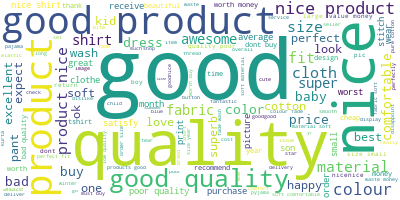

In [ ]:
# Word Cloud Analysis (Positive Reviews)
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['review'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
filtered_words = [word for word in long_string.split()]
import collections
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

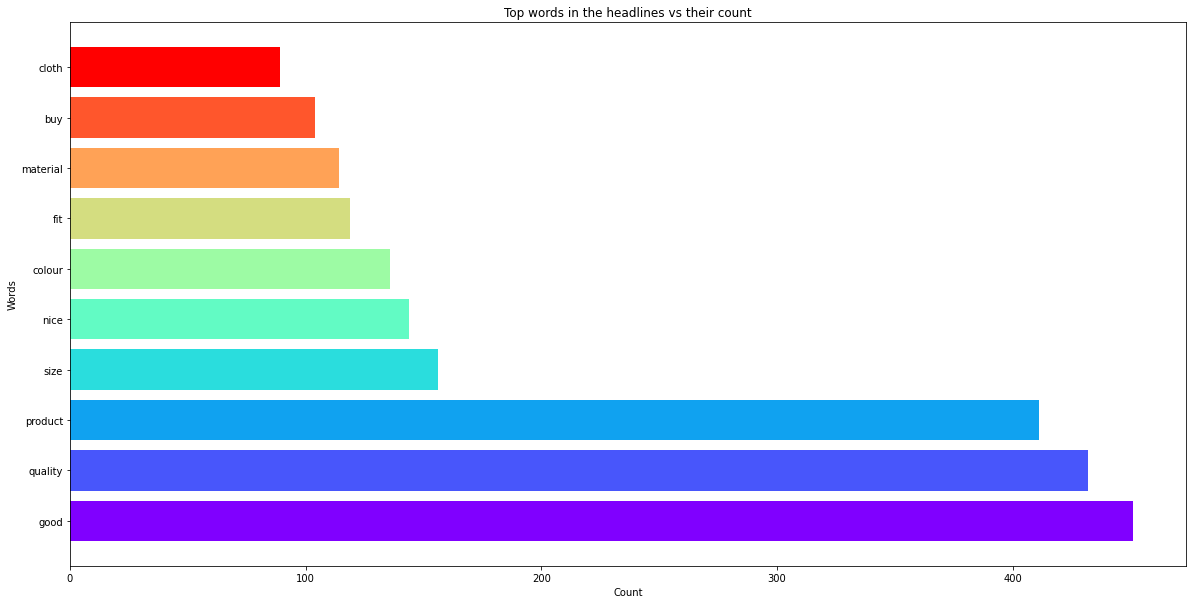

In [ ]:
import matplotlib.cm as cm
from matplotlib import rcParams
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

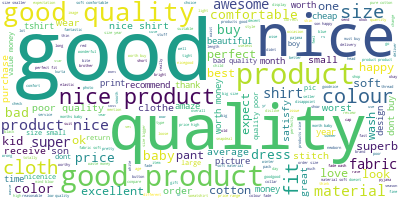

In [ ]:
# Word Cloud Analysis (Negative Reviews)
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['review'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## Sentiment Analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
d=df.copy()
results = []
recom=[]
for headline in d['review']:
    pol_score = SIA().polarity_scores(headline) # run analysis
    results.append(pol_score)
result_sentiment= pd.DataFrame(results)
for i in result_sentiment['compound']:
  if (i>0):
    recom.append("Positive")
  elif (i<0) :
    recom.append("Negative")
  else:
    recom.append("Neutral")

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
result_sentiment['review']= df['review']
result_sentiment

,neg,neu,pos,compound,review
0,0.0,0.213,0.787,0.5719,excellent look
1,0.0,0.256,0.744,0.4404,good product
2,0.0,0.263,0.737,0.4215,nice dress
3,0.0,0.192,0.808,0.6369,love clothe
4,0.0,0.379,0.621,0.7624,really product photo satisfy trust maintain
...,...,...,...,...,...
2246,0.0,1.000,0.000,0.0000,cheapcheap
2247,0.0,1.000,0.000,0.0000,colour fade pic colour fade
2248,0.0,1.000,0.000,0.0000,bandit tear knee side
2249,0.0,1.000,0.000,0.0000,size small size small


In [ ]:
l=[]
from textblob import TextBlob
for i in range(len(result_sentiment)):
  text= result_sentiment.iloc[i,4]
  opinion = TextBlob(text)
  l.append(opinion.sentiment)
result_sentiment['text_blob']=l
result_sentiment

,neg,neu,pos,compound,review,text_blob
0,0.0,0.213,0.787,0.5719,excellent look,"(1.0, 1.0)"
1,0.0,0.256,0.744,0.4404,good product,"(0.7, 0.6000000000000001)"
2,0.0,0.263,0.737,0.4215,nice dress,"(0.6, 1.0)"
3,0.0,0.192,0.808,0.6369,love clothe,"(0.5, 0.6)"
4,0.0,0.379,0.621,0.7624,really product photo satisfy trust maintain,"(0.2, 0.2)"
...,...,...,...,...,...,...
2246,0.0,1.000,0.000,0.0000,cheapcheap,"(0.0, 0.0)"
2247,0.0,1.000,0.000,0.0000,colour fade pic colour fade,"(0.0, 0.0)"
2248,0.0,1.000,0.000,0.0000,bandit tear knee side,"(0.0, 0.0)"
2249,0.0,1.000,0.000,0.0000,size small size small,"(-0.25, 0.4)"


In [ ]:
result_sentiment["Recommendation"]=recom
result_sentiment["review"]= d["review"]


In [ ]:
result_sentiment

,neg,neu,pos,compound,review,text_blob,Recommendation
0,0.0,0.213,0.787,0.5719,excellent look,"(1.0, 1.0)",Positive
1,0.0,0.256,0.744,0.4404,good product,"(0.7, 0.6000000000000001)",Positive
2,0.0,0.263,0.737,0.4215,nice dress,"(0.6, 1.0)",Positive
3,0.0,0.192,0.808,0.6369,love clothe,"(0.5, 0.6)",Positive
4,0.0,0.379,0.621,0.7624,really product photo satisfy trust maintain,"(0.2, 0.2)",Positive
...,...,...,...,...,...,...,...
2246,0.0,1.000,0.000,0.0000,cheapcheap,"(0.0, 0.0)",Neutral
2247,0.0,1.000,0.000,0.0000,colour fade pic colour fade,"(0.0, 0.0)",Neutral
2248,0.0,1.000,0.000,0.0000,bandit tear knee side,"(0.0, 0.0)",Neutral
2249,0.0,1.000,0.000,0.0000,size small size small,"(-0.25, 0.4)",Neutral


In [ ]:
Positive = result_sentiment[result_sentiment['Recommendation']=="Positive"]
Neutral = result_sentiment[result_sentiment['Recommendation']=="Neutral"]
Negative = result_sentiment[result_sentiment['Recommendation']=="Negative"]

In [ ]:
print(len(Positive))
print(len(Neutral))
print(len(Negative))

1797
236
218


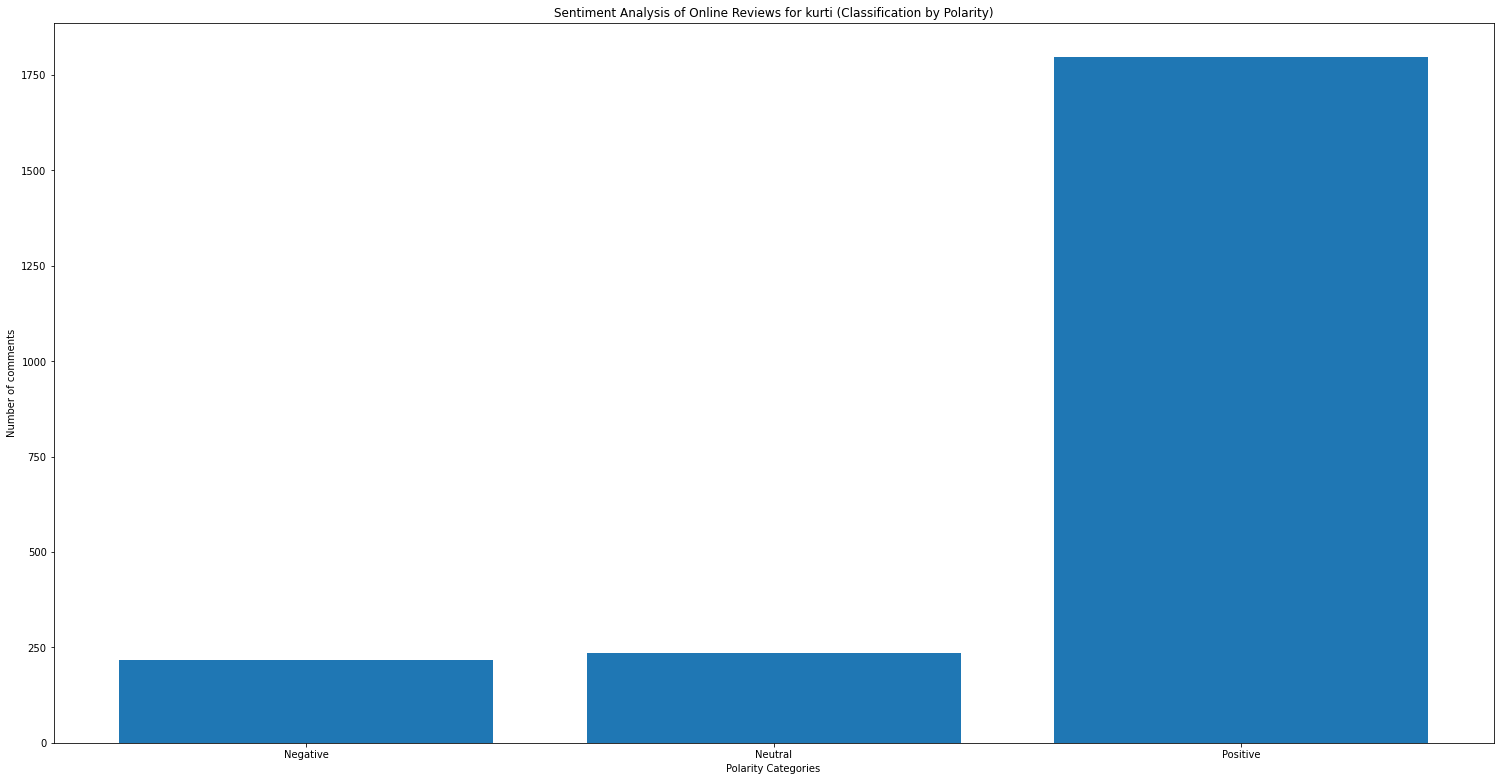

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Negative', 'Neutral', 'Positive']
students = [len(Negative), len(Neutral), len(Positive)]
ax.bar(langs,students)
plt.title('Sentiment Analysis of Online Reviews for kurti (Classification by Polarity)')
plt.xlabel('Polarity Categories')
plt.ylabel('Number of comments')
plt.show()

In [ ]:
#Install package using pip
!pip install text2emotion

     |████████████████████████████████| 61kB 5.2MB/s 
     |████████████████████████████████| 133kB 12.7MB/s 


In [ ]:
#Import the modules
import text2emotion as te

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
d=df.copy()
emotions = []
emotion = []
for text in d['review']:
    emo_score = te.get_emotion(text) # run analysis
    max_emo = max(emo_score,key=emo_score.get)
    emotions.append(max_emo)


In [ ]:
te.get_emotion("happy")

{'Angry': 0.0, 'Fear': 0.0, 'Happy': 1.0, 'Sad': 0.0, 'Surprise': 0.0}

In [ ]:
result_sentiment["Emotions"]=emotions

In [ ]:
result_sentiment

,neg,neu,pos,compound,review,text_blob,Recommendation,Emotions
0,0.0,0.213,0.787,0.5719,excellent look,"(1.0, 1.0)",Positive,Happy
1,0.0,0.256,0.744,0.4404,good product,"(0.7, 0.6000000000000001)",Positive,Happy
2,0.0,0.263,0.737,0.4215,nice dress,"(0.6, 1.0)",Positive,Happy
3,0.0,0.192,0.808,0.6369,love clothe,"(0.5, 0.6)",Positive,Happy
4,0.0,0.379,0.621,0.7624,really product photo satisfy trust maintain,"(0.2, 0.2)",Positive,Surprise
...,...,...,...,...,...,...,...,...
2246,0.0,1.000,0.000,0.0000,cheapcheap,"(0.0, 0.0)",Neutral,Happy
2247,0.0,1.000,0.000,0.0000,colour fade pic colour fade,"(0.0, 0.0)",Neutral,Angry
2248,0.0,1.000,0.000,0.0000,bandit tear knee side,"(0.0, 0.0)",Neutral,Sad
2249,0.0,1.000,0.000,0.0000,size small size small,"(-0.25, 0.4)",Neutral,Happy


In [ ]:
Angry = result_sentiment[result_sentiment['Emotions']=="Angry"]
Fear = result_sentiment[result_sentiment['Emotions']=="Fear"]
Happy = result_sentiment[result_sentiment['Emotions']=="Happy"]
Sad = result_sentiment[result_sentiment['Emotions']=="Sad"]
Surprise = result_sentiment[result_sentiment['Emotions']=="Surprise"]

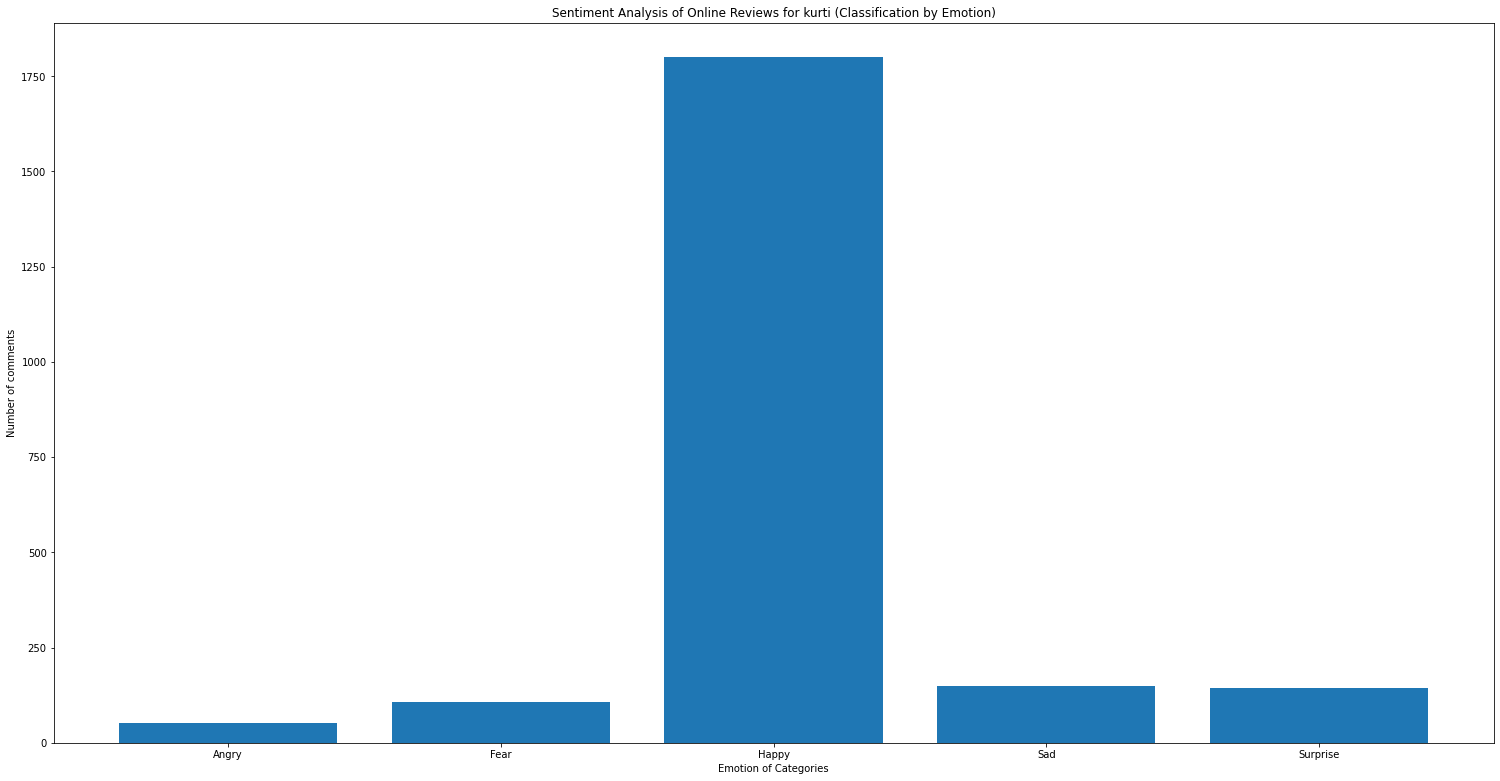

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Angry', 'Fear', 'Happy', 'Sad', 'Surprise']
students = [len(Angry), len(Fear), len(Happy), len(Sad), len(Surprise)]
ax.bar(langs,students)
plt.title('Sentiment Analysis of Online Reviews for kurti (Classification by Emotion)')
plt.xlabel('Emotion of Categories')
plt.ylabel('Number of comments')
plt.show()

## Text classification model for recommendation

In [ ]:
X = df['review']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test = train_test_split(X, test_size=0.25, random_state=768)

In [ ]:
#n-gram data (change ngram_range to 2,2 if using bigram token pattern also 2, similarly for trigram, use 3)
tfidf_vect_ngram = TfidfVectorizer(analyzer='word',ngram_range = (1,1), token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect_ngram.fit(df['review'])
X_train =  tfidf_vect_ngram.transform(X_train)
X_test =  tfidf_vect_ngram.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train.todense(), columns=tfidf_vect_ngram.get_feature_names())
X_test = pd.DataFrame(X_test.todense(), columns=tfidf_vect_ngram.get_feature_names())

In [ ]:
X_train

,absolutely,ac,accept,acceptation,accha,accord,accordingly,accurate,accurately,acknowledge,action,actual,addition,adjust,adjustable,administration,adorable,advantage,affordable,age,agood,ahead,ahhaa,ahhhh,air,alike,allergic,also,alter,amaze,amazingly,amazon,amazons,ambiguous,analysis,angel,anybody,anymore,anyone,app,...,width,widthwise,winter,wise,wishmaster,wonderful,wont,wood,wooden,wool,woolen,word,wordperfect,work,worry,worse,worst,worth,worthful,worthnet,worthquality,worthy,wouldnt,wow,wrist,write,wrong,wrongnot,xl,yaa,yeah,year,years,yellow,yes,yet,yr,yrs,zip,zipper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.259977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.751031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.cluster import KMeans
X_clustering=tfidf_vect_ngram.transform(X)
X_clustering=pd.DataFrame(X_clustering.todense(), columns=tfidf_vect_ngram.get_feature_names())
model_unsupervised = KMeans(n_clusters=2)
model_dendrites=model_unsupervised.fit(X_clustering)
y_predicted = model_unsupervised.fit_predict(X_clustering)
#print(sum(abs(y-y_predicted)))
model_unsupervised.cluster_centers_

array([[ 7.67322800e-05,  3.80895843e-04,  5.85552781e-04, ...,
         1.80353051e-03,  1.79666596e-04,  1.07397695e-04],
       [-3.65918233e-19, -1.24683250e-18,  1.22483704e-03, ...,
        -1.60461922e-17,  8.40256684e-19, -2.71050543e-20]])

In [ ]:
from sklearn.cluster import AgglomerativeClustering
X_clustering=tfidf_vect_ngram.transform(X)
X_clustering=pd.DataFrame(X_clustering.todense(), columns=tfidf_vect_ngram.get_feature_names())
model_unsupervised = AgglomerativeClustering()
model_dendrites=model_unsupervised.fit(X_clustering)
y_predicted = model_unsupervised.fit_predict(X_clustering)


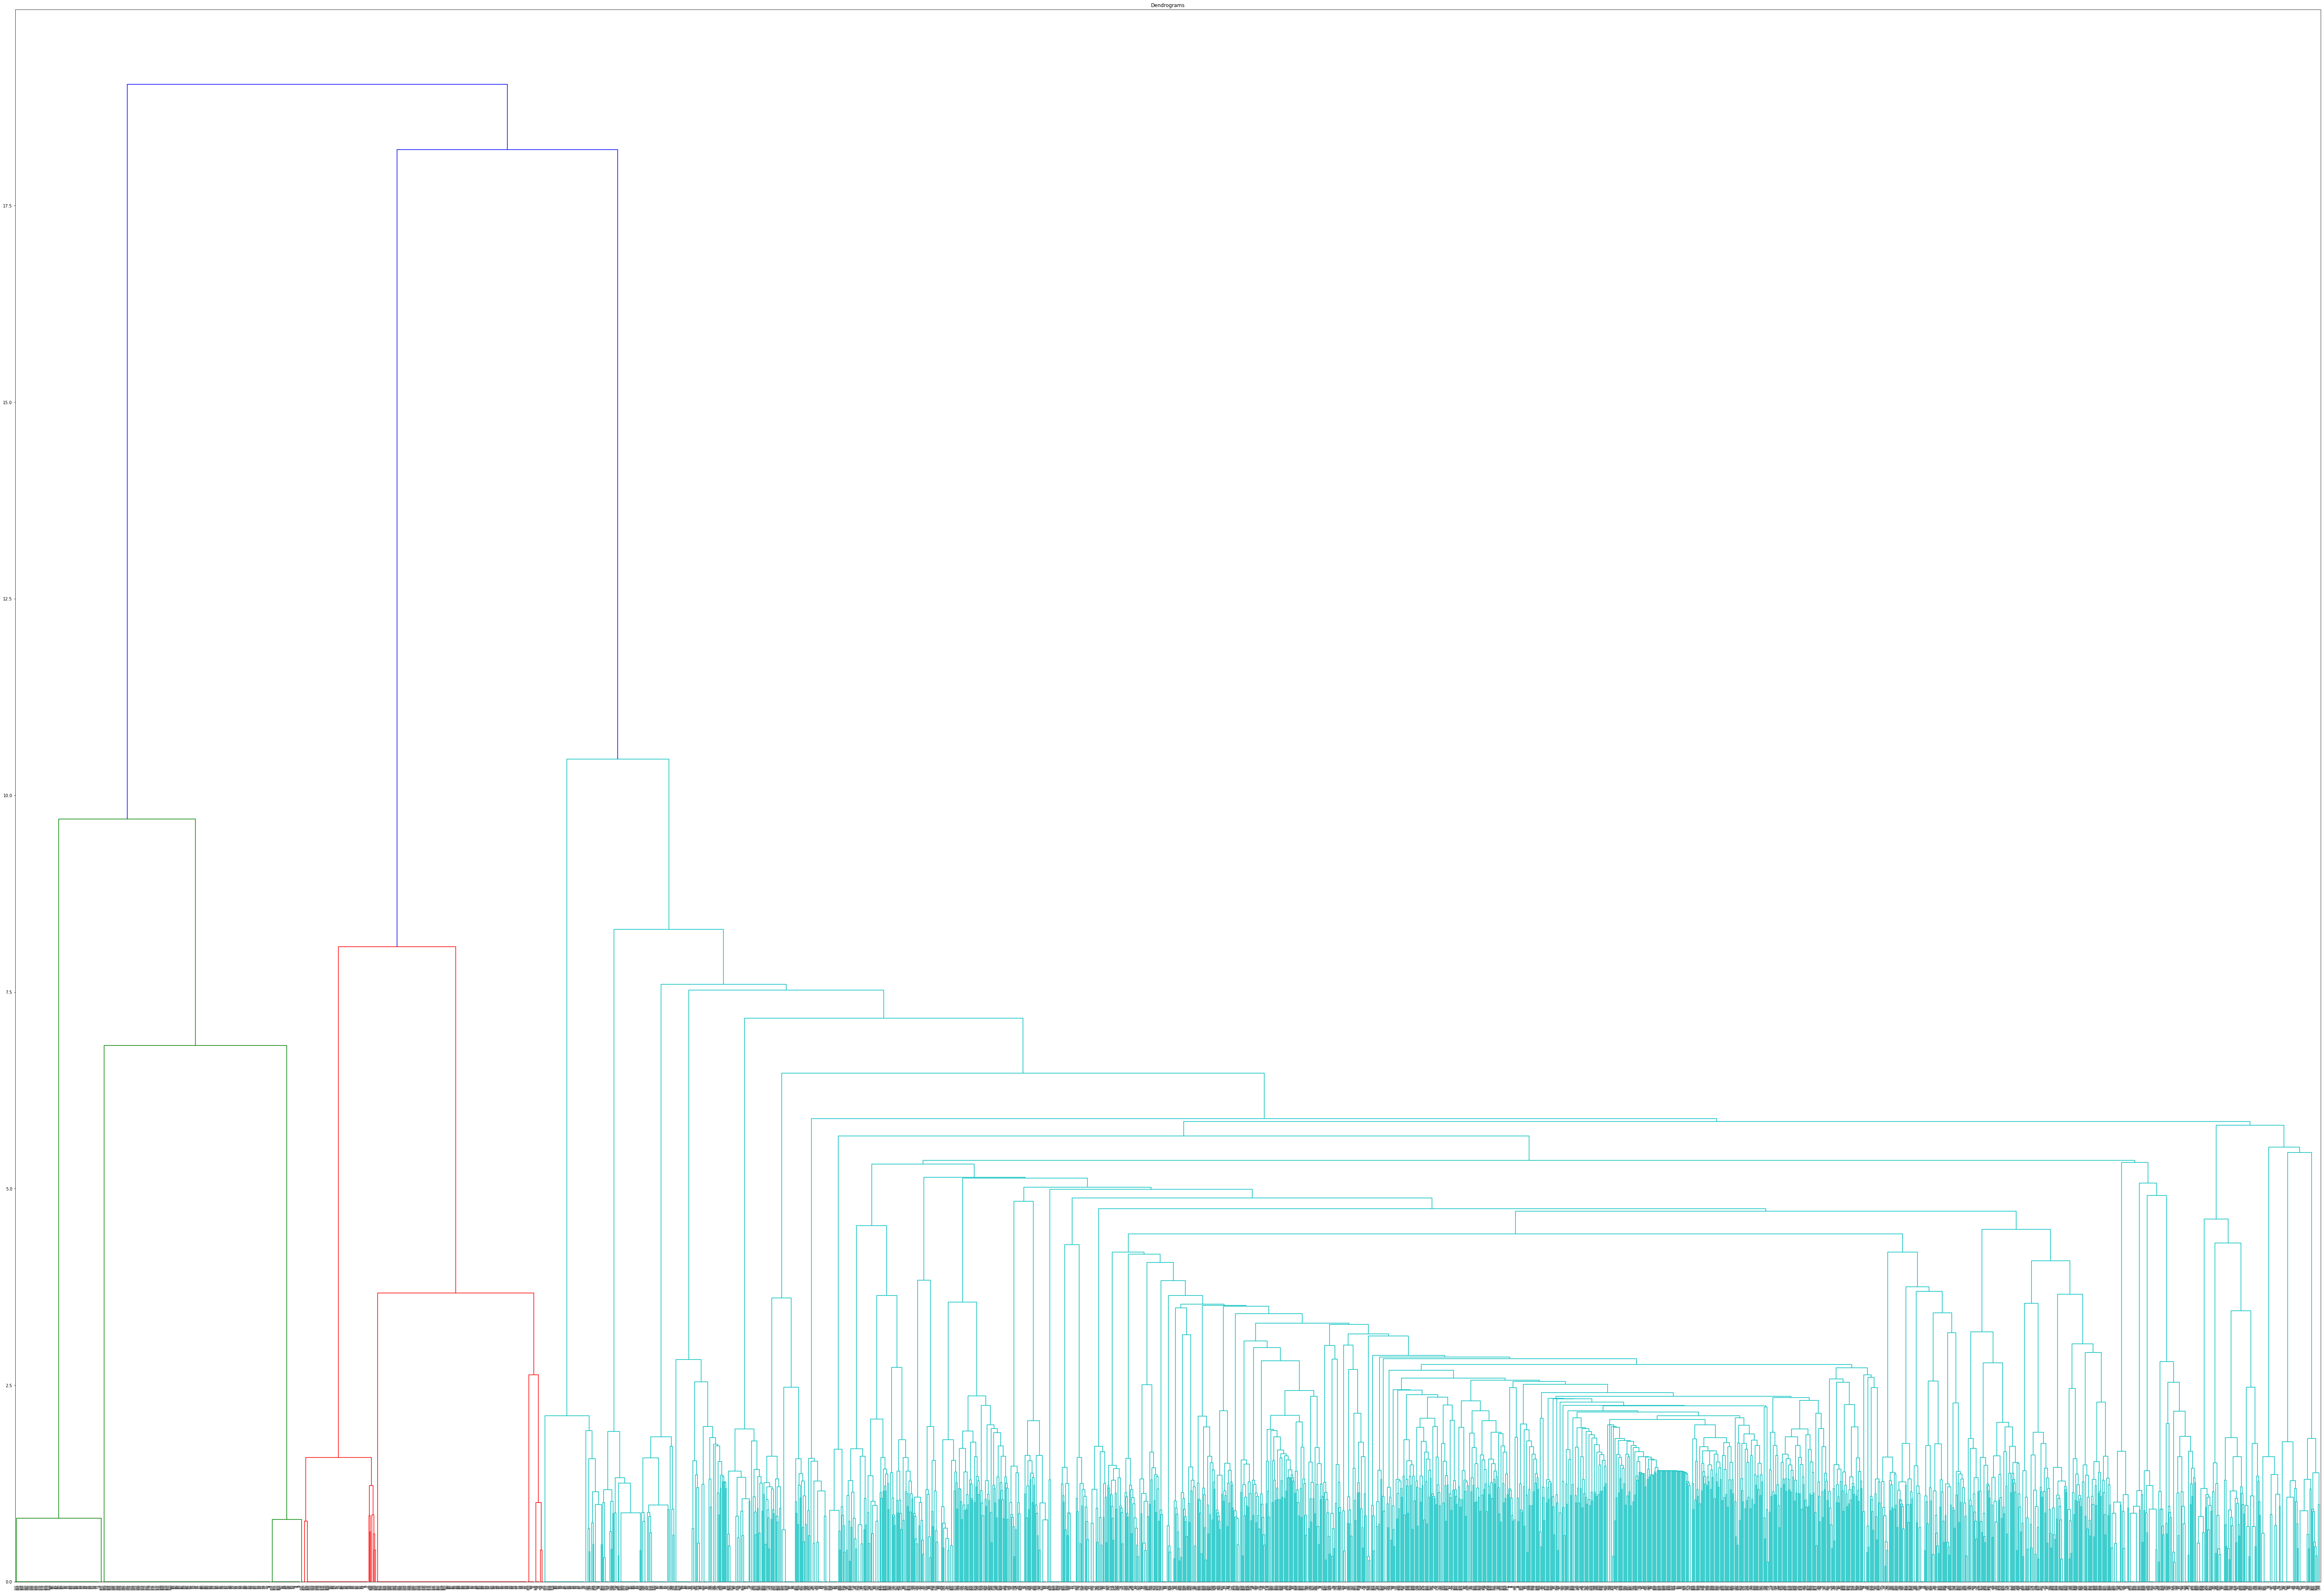

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(100, 70))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_clustering, method='ward'))

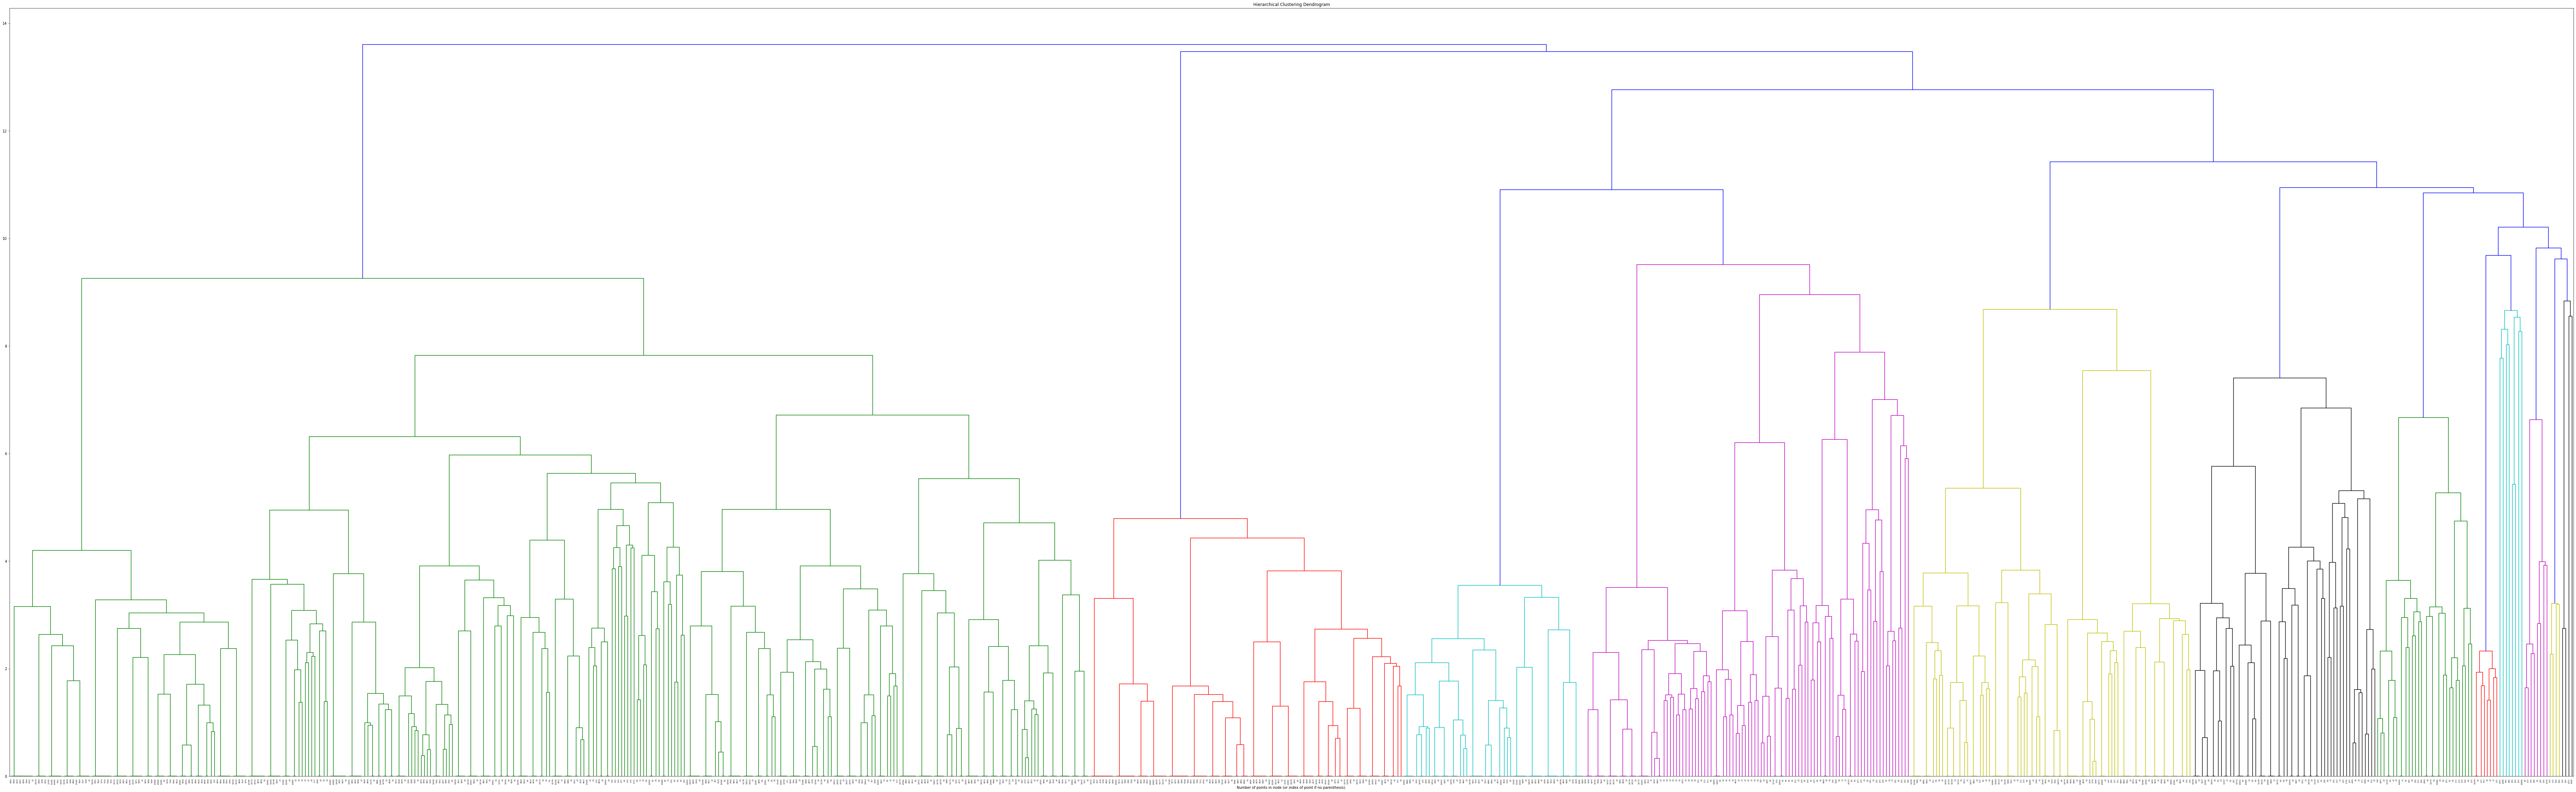

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
     # Create linkage matrix and then plot the dendrogram

     # create the counts of samples under each node
     counts = np.zeros(model.children_.shape[0])
     n_samples = len(model.labels_)
     for i, merge in enumerate(model.children_):
         current_count = 0
         for child_idx in merge:
             if child_idx < n_samples:
                 current_count += 1  # leaf node
             else:
                 current_count += counts[child_idx - n_samples]
         counts[i] = current_count

     linkage_matrix = np.column_stack([model.children_, model.distances_,
                                       counts]).astype(float)

     # Plot the corresponding dendrogram
     dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X_clustering)
plt.figure(1,figsize = (130,40))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()

In [ ]:
# model = MultinomialNB()
# from sklearn.tree import DecisionTreeClassifier 
# model=clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100)
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(solver='liblinear', random_state=10654)
# from sklearn import svm
# model = svm.SVC()
# from sklearn.ensemble import RandomForestClassifier 
# model = RandomForestClassifier(n_estimators = 100) 
from xgboost import XGBClassifier  
model = XGBClassifier()

In [ ]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.7-cp37-none-any.whl size=10670 sha256=d93c3a23eac8730f9fa8f8c1048182d5bc557b4b1eab51788dc981e2b5fe2eca
  Stored in directory: /root/.cache/pip/wheels/16/08/23/9d90df482c9c943df4d6fe874c0937f8e81dc3db917c9300c2
Successfully built rfpimp


In [ ]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
   return r2_score(y_train, model.predict(X_train))

perm_imp_rfpimp = permutation_importances(model, X_train, y_train,r2)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
print(perm_imp_rfpimp[:10])
print(perm_imp_rfpimp[-10:])

           Importance
Feature              
not          0.357726
good         0.156055
love         0.089632
wash         0.079228
nice         0.076027
beautiful    0.060821
bad          0.060021
awesome      0.058421
perfect      0.046416
fit          0.039214
            Importance
Feature               
flpkrt        0.000000
flpkrtgood    0.000000
fly           0.000000
foil          0.000000
zero          0.000000
elegant      -0.000800
large        -0.000800
come         -0.000800
worst        -0.000800
thin         -0.003201


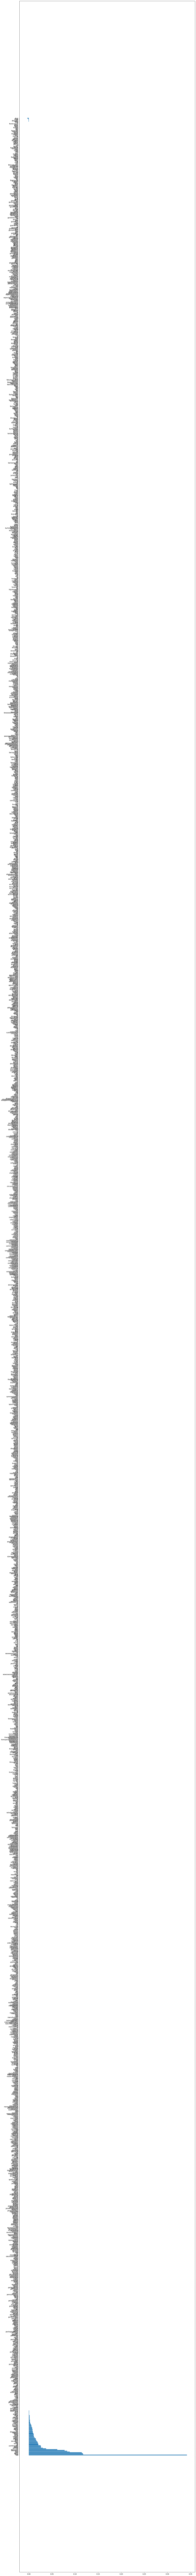

In [ ]:
import matplotlib.pyplot as plt
width_in_inches = 20
height_in_inches = 300
dots_per_inch = 70

plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
plt.barh(perm_imp_rfpimp.index, perm_imp_rfpimp['Importance'])
plt.show()


In [ ]:
pip install eli5

     |████████████████████████████████| 112kB 5.7MB/s 


In [ ]:
def imp_df(column_names, importances):
     df = pd.DataFrame({'feature': column_names,
                        'feature_importance': importances}) \
            .sort_values('feature_importance', ascending = False) \
            .reset_index(drop = True)
     return df

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

#perm = PermutationImportance(model, cv = None, refit = False, n_iter = 50).fit(X_train, y_train)
perm = PermutationImportance(model, cv = None, refit = False, n_iter = 5).fit(X_train, y_train)
perm_imp_eli5 = imp_df(X_train.columns, perm.feature_importances_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# eli5 1 hr + for 5 , 13m each

In [ ]:
perm_imp_eli5= perm_imp_eli5.head(10)

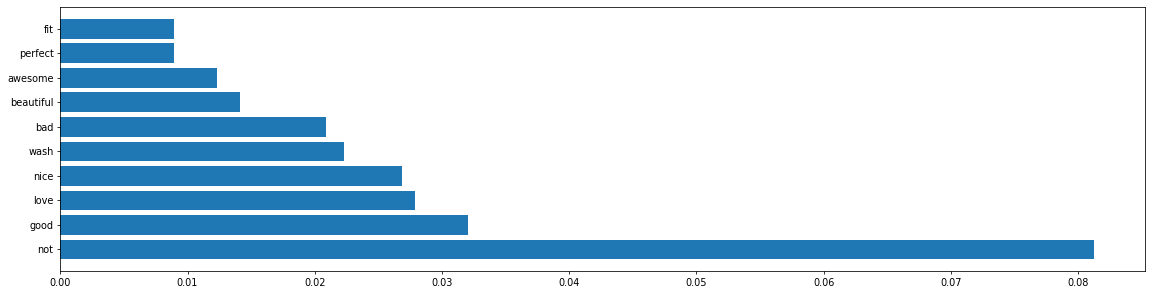

In [ ]:
import matplotlib.pyplot as plt
width_in_inches = 20
height_in_inches =5
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)
plt.barh(perm_imp_eli5['feature'], perm_imp_eli5['feature_importance'])
plt.show()

In [ ]:
from sklearn.base import clone 

def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = imp_df(X_train.columns, importances)
    return importances_df
imp=drop_col_feat_imp(model, X_train, y_train)

0
0
0


KeyboardInterrupt: ignored

In [ ]:
len(X_train)

8389

In [ ]:
# will take 5 days to complete
# 42 s

In [ ]:
imp

In [ ]:
import matplotlib.pyplot as plt
width_in_inches = 20
height_in_inches = 100
dots_per_inch = 70

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)
plt.barh(imp['feature'], imp['feature_importance'])
plt.show()

In [ ]:
print(X_test)

       aa  aap  abroad  absoloutely  absolute  ...  ystrdy  yur    z  zarort  zero
0     0.0  0.0     0.0          0.0       0.0  ...     0.0  0.0  0.0     0.0   0.0
1     0.0  0.0     0.0          0.0       0.0  ...     0.0  0.0  0.0     0.0   0.0
2     0.0  0.0     0.0          0.0       0.0  ...     0.0  0.0  0.0     0.0   0.0
3     0.0  0.0     0.0          0.0       0.0  ...     0.0  0.0  0.0     0.0   0.0
4     0.0  0.0     0.0          0.0       0.0  ...     0.0  0.0  0.0     0.0   0.0
...   ...  ...     ...          ...       ...  ...     ...  ...  ...     ...   ...
2792  0.0  0.0     0.0          0.0       0.0  ...     0.0  0.0  0.0     0.0   0.0
2793  0.0  0.0     0.0          0.0       0.0  ...     0.0  0.0  0.0     0.0   0.0
2794  0.0  0.0     0.0          0.0       0.0  ...     0.0  0.0  0.0     0.0   0.0
2795  0.0  0.0     0.0          0.0       0.0  ...     0.0  0.0  0.0     0.0   0.0
2796  0.0  0.0     0.0          0.0       0.0  ...     0.0  0.0  0.0     0.0   0.0

[27

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
#accuracy on train set
model.score(X_train,y_train)

0.8495649064250804

In [ ]:

#accuracy on test set
model.score(X_test,y_test)

0.8462638541294244

In [ ]:
y_train.value_counts()

1    4195
0    4194
Name: Recommended, dtype: int64

In [ ]:
y_test.value_counts()

0    1399
1    1398
Name: Recommended, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score

In [ ]:
f1_score(y_test,predictions)

0.8460987831066571

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1399
           1       0.85      0.85      0.85      1398

    accuracy                           0.85      2797
   macro avg       0.85      0.85      0.85      2797
weighted avg       0.85      0.85      0.85      2797



In [ ]:
print(confusion_matrix(y_test,predictions)) 

[[1185  214]
 [ 216 1182]]


In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

id2word = corpora.Dictionary([X_train[:]])

# Create Corpus
texts = [X_train[:]]

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1)

In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.001*"lovers" + 0.001*"match" + 0.001*"suggest" + 0.001*"like" + '
  '0.001*"compy" + 0.001*"lools" + 0.001*"soft" + 0.001*"royal" + 0.001*"chip" '
  '+ 0.001*"stick"'),
 (1,
  '0.001*"top" + 0.001*"translucent" + 0.001*"scatter" + 0.001*"hu" + '
  '0.001*"buy" + 0.001*"margins" + 0.001*"stylist" + 0.001*"info" + '
  '0.001*"summary" + 0.001*"display"'),
 (2,
  '0.001*"xxxl" + 0.001*"cover" + 0.000*"umbrella" + 0.000*"anyone" + '
  '0.000*"curve" + 0.000*"uneven" + 0.000*"vibrancy" + 0.000*"lift" + '
  '0.000*"peice" + 0.000*"inspite"'),
 (3,
  '0.001*"jewellery" + 0.001*"prblm" + 0.000*"allergitic" + 0.000*"except" + '
  '0.000*"small" + 0.000*"kgs" + 0.000*"packet" + 0.000*"style" + 0.000*"stun" '
  '+ 0.000*"us"'),
 (4,
  '0.001*"comfort" + 0.001*"every" + 0.001*"pure" + 0.000*"thread" + '
  '0.000*"supervisor" + 0.000*"window" + 0.000*"due" + 0.000*"hips" + '
  '0.000*"jansya" + 0.000*"bias"'),
 (5,
  '0.001*"ridiculous" + 0.001*"avergae" + 0.001*"fitment" + 0.001*"meet" +

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.7424046306703987


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=40, step=6)

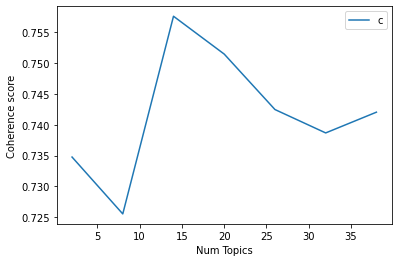

In [ ]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.7348
Num Topics = 8  has Coherence Value of 0.7255
Num Topics = 14  has Coherence Value of 0.7576
Num Topics = 20  has Coherence Value of 0.7515
Num Topics = 26  has Coherence Value of 0.7425
Num Topics = 32  has Coherence Value of 0.7387
Num Topics = 38  has Coherence Value of 0.742


In [ ]:
from sklearn.neural_network import MLPClassifier
ans=[]
from sklearn.linear_model import LogisticRegression
a = LogisticRegression(solver='liblinear', random_state=10654)
from sklearn.tree import DecisionTreeClassifier 
b=clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100)
from sklearn.ensemble import RandomForestClassifier 
c = RandomForestClassifier(n_estimators = 100) 
d = MultinomialNB()
e= MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 4), random_state=1)
from sklearn import svm
f = svm.SVC()
from xgboost import XGBClassifier  
g = XGBClassifier()
#mod=[a,b,c,d,e,f,g]
mod=[f]
for model in mod:
  list_of_scores=[]
  from sklearn.metrics import confusion_matrix,classification_report,f1_score
  import numpy as np
  from sklearn.model_selection import KFold
  kf = KFold(n_splits=2, shuffle=True, random_state=1986)
  for train, test in kf.split(df1): 
    a=[]
    X_train = []
    X_test = []
    y_train =[]
    y_test = []
    for i in train:
      X_train.append(df1.iloc[i, 0])
      y_train.append(df1.iloc[i, 1])
    for i in test: 
      X_test.append(df1.iloc[i, 0])
      y_test.append(df1.iloc[i, 1])
    tfidf_vect_ngram = TfidfVectorizer(analyzer='word',ngram_range = (3,3), token_pattern=r'\w{3,}', max_features=5000)
    tfidf_vect_ngram.fit(df1['text'])
    X_train =  tfidf_vect_ngram.transform(X_train)
    X_test =  tfidf_vect_ngram.transform(X_test)
    X_train = pd.DataFrame(X_train.todense(), columns=tfidf_vect_ngram.get_feature_names())
    X_test = pd.DataFrame(X_test.todense(), columns=tfidf_vect_ngram.get_feature_names())
    model1 = model
    model1.fit(X_train,y_train)
    predictions = model1.predict(X_test)
    a.append(model1.score(X_train,y_train))
    a.append(model1.score(X_test,y_test))
    a.append(f1_score(y_test,predictions))
    from sklearn.metrics import confusion_matrix
    cm1 = confusion_matrix(y_test, predictions)
    sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    a.append( sensitivity1 )
    specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    a.append(specificity1)
    list_of_scores.append(a)
    #print(list_of_scores)
  acc=pd.DataFrame(list_of_scores,columns =['Model Training Score','Model Test Score', 'F1 Score', 'Sensetivity', 'specificity'])
  print("Model Train Score",acc['Model Training Score'].mean())
  x=acc['Model Training Score'].mean()
  print("Model Test Score", acc['Model Test Score'].mean())
  y=acc['Model Test Score'].mean()
  print("F1 Score", acc['F1 Score'].mean())
  z=acc['F1 Score'].mean()
  print("Sensetivity", acc['Sensetivity'].mean())
  w=acc['Sensetivity'].mean()
  print("Specificity", acc['specificity'].mean())
  v=acc['specificity'].mean()
  print("-" * 30)
  temp=[]
  temp.append(x)
  temp.append(y)
  temp.append(z)
  temp.append(w)
  temp.append(v)
  ans.append(temp)
final=pd.DataFrame(list_of_scores,columns =['Model Training Score','Model Test Score', 'F1 Score', 'Sensetivity', 'specificity'])
print(final)



Model Train Score 0.8866666666666667
Model Test Score 0.8480365296803654
F1 Score 0.8594203868626047
Sensetivity 0.7669400094957409
Specificity 0.9291220202709248
------------------------------
   Model Training Score  Model Test Score  F1 Score  Sensetivity  specificity
0              0.886941          0.851142  0.862910     0.766557     0.935449
1              0.886393          0.844932  0.855931     0.767323     0.922795


In [ ]:
df1.head()

,text,Recommended
0,really product show picture good material prob...,1
1,exactly show image fabulous kurta go,1
2,love color much brighter beautiful show pictur...,1
3,good quality chanderi material line golden seq...,1
4,want kurti skirt also buy amazon months kurti ...,1
